In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("iris_xlsx.xlsx")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df["Species"] = (df["Species"] == "virginica") + 0

In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
model = sm.Logit(df["Species"],
                 df.iloc[:, :4])

In [8]:
model_result = model.fit()
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.072266
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  150
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                  0.8865
Time:                        18:29:48   Log-Likelihood:                -10.840
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 1.825e-36
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal.Length    -6.3277      2.479     -2.552      0.011     -11.187      -1.468
Sepal.Width     -6.6182      2.529     -2.616      0.009     -11.576      -1.661
Petal.Length     8.4338      3.470      2.431      0.015       1.633      15.235
Petal.Width     10.2825      3.459      2.972      0.003       3.502      17.063
================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [9]:
model_result.predict(df.iloc[:, :4]).head()

0    8.827975e-19
1    8.562504e-17
2    3.476128e-17
3    6.852988e-16
4    8.575240e-19
dtype: float64

In [10]:
df["pred"] = model_result.predict(df.iloc[:, :4])
df.loc[:, "pred_class"] = (df["pred"] >= 0.9) + 0
pd.crosstab(df["Species"], df["pred_class"])

pred_class,0,1
Species,,
0,99,1
1,8,42


In [13]:
metrics.accuracy_score(y_true = df["Species"],
                       y_pred = df["pred_class"])

0.94

In [14]:
metrics.f1_score(y_true = df["Species"],
                       y_pred = df["pred_class"])

0.9032258064516129

In [15]:
# metrics.recall_score()
# metrics.precision_score()

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(df["Species"], df["pred"])
metrics.auc(fpr, tpr)

0.9962

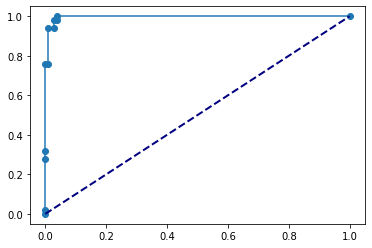

In [18]:
plt.plot(fpr, tpr, "o-")
plt.plot([0, 1], [0, 1], color = "navy", lw = 2, linestyle = "--")
plt.show()